## Polynomial Regression

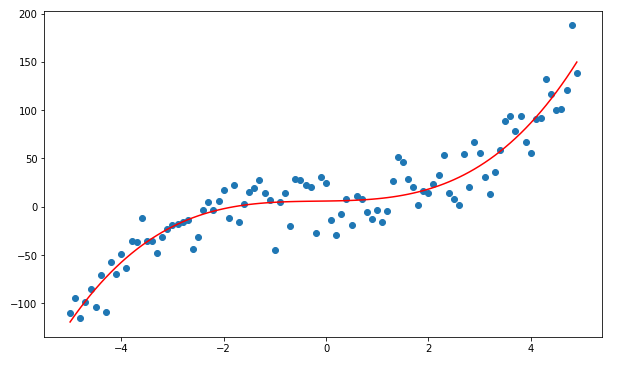

Sometimes we have data that does not merely follow a linear trend. We sometimes have data that follows a polynomial trend. Therefore, we are going to use polynomial regression.

Before digging into its implementation, we need to know how the graphs of some primary polynomial data look.

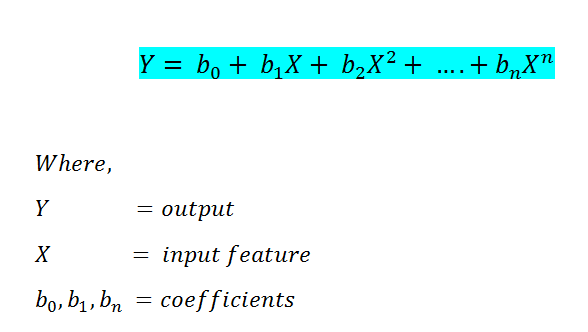

In [2]:
# Import required libraries:
import numpy as np
import matplotlib.pyplot as plt

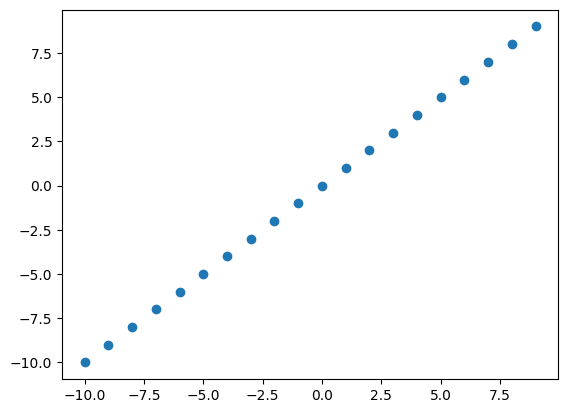

In [7]:
#Graph for Y=X:

x = np.arange(-10,10)
y = x

plt.scatter(x,y)

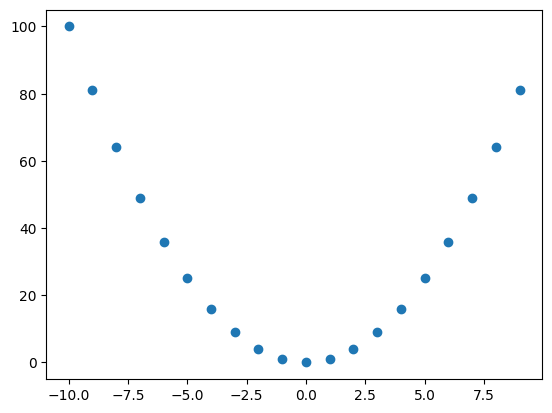

In [8]:
#Graph for Y=X2:

x = np.arange(-10,10)
y = np.power(x,2)

plt.scatter(x,y)

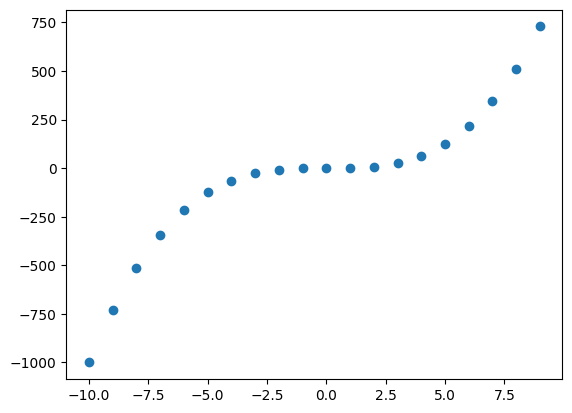

In [9]:
#Graph for Y=X3 - polynomial

x = np.arange(-10,10)
y = np.power(x,3)

plt.scatter(x,y)

### Solving Polynomial reg problem

Now in this, we are going to use Normal Equation to implement it. Here notice that we can use scikit-learn for implementing polynomial regression also, but another method will give us an insight into how it works.

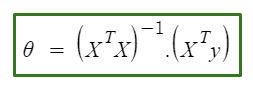

In the equation above:

θ: hypothesis parameters that define it the best.

X: input feature value of each instance.

Y: Output value of each instance.

1.3.1 Hypothesis Function for Polynomial Regression

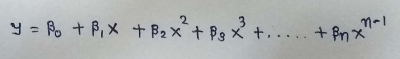

The main matrix in the standard equation:

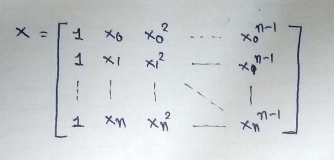

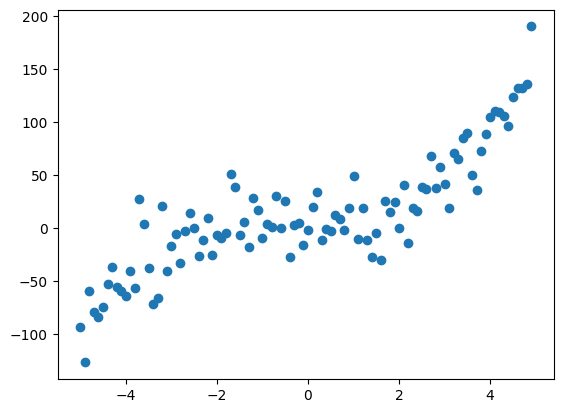

In [10]:
# Generate datapoints:
x = np.arange(-5,5,0.1)
y_noise = 20 * np.random.normal(size = len(x))
y = 1*(x**3) + 1*(x**2) + 1*x + 3+y_noise
plt.scatter(x,y)

In [12]:
#Initialize x,x²,x³ vectors:
# We are taking the maximum power of x as 3. So our X matrix will have X, X², X³

x1 = x
x2 = np.power(x1,2)
x3 = np.power(x1,3)
n = len(x1)

In [5]:
# Reshaping data:
x1_new = np.reshape(x1,(n,1))
x2_new = np.reshape(x2,(n,1))
x3_new = np.reshape(x3,(n,1))

In [13]:
# Column-1 of X matrix:
##First column of matrix X:

x_bias = np.ones((n,1))

In [14]:
#Form the complete x matrix:
x_new = np.append(x_bias,x1_new,axis=1)
x_new = np.append(x_new,x2_new,axis=1)
x_new = np.append(x_new,x3_new,axis=1)

In [17]:
# Finding transpose:
x_new_transpose = np.transpose(x_new)

In [18]:
# Finding dot product of original and transposed matrix :
x_new_transpose_dot_x_new = x_new_transpose.dot(x_new)

In [19]:
# Finding Inverse:
temp_1 = np.linalg.inv(x_new_transpose_dot_x_new)# Finding the dot product of transposed x and y :


In [21]:
# Finding coefficients:
# Matrix multiplication:
#Finding the multiplication of transposed X and the Y vector and storing it in the temp2 variable.
temp_2 = x_new_transpose.dot(y)

array([ 3.96439887, -0.2616128 ,  1.20650204,  1.08889417])

In [23]:
#Coefficient values:
#To find the coefficient values, we need to multiply temp1 and temp2. See the Normal Equation formula

theta = temp_1.dot(temp_2)
theta

array([ 3.96439887, -0.2616128 ,  1.20650204,  1.08889417])

In [24]:
#Store the coefficients in variables:
#Storing those coefficient values in different variables.
beta_0 = theta[0]
beta_1 = theta[1]
beta_2 = theta[2]
beta_3 = theta[3]

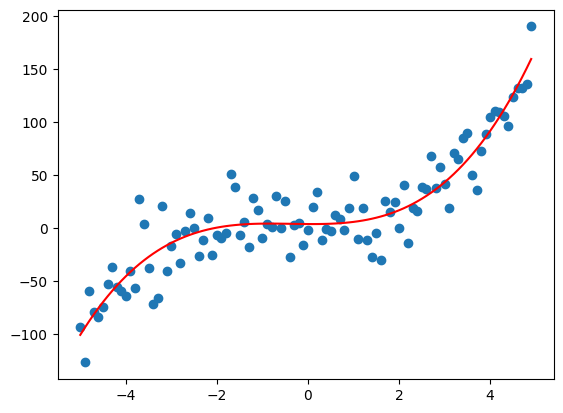

In [25]:
# Plot the polynomial curve:
plt.scatter(x,y)
plt.plot(x,beta_0 + beta_1*x1 + beta_2*x2 + beta_3*x3,c="red")

In [26]:
# Prediction function:
def prediction(x1,x2,x3,beta_0,beta_1,beta_2,beta_3):
 y_pred = beta_0 + beta_1*x1 + beta_2*x2 + beta_3*x3
 return y_pred

In [27]:
# Making predictions:
pred = prediction(x1,x2,x3,beta_0,beta_1,beta_2,beta_3)

In [30]:
# Calculate accuracy of model:
def err(y_pred,y):
    var = (y - y_pred)
    var = var*var
    n = len(var)
    MSE = var.sum()
    MSE = MSE/n
    return MSE

In [31]:
# Calculating the error:
error = err(pred,y)
error

438.9820846956017